In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data_2015 = pd.read_csv('2015.csv')
data_2016 = pd.read_csv('2016.csv')
data_2017 = pd.read_csv('2017.csv')
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')
data_2020 = pd.read_csv('2020.csv')
data_2021 = pd.read_csv('2021.csv')
data_2022 = pd.read_csv('2022.csv')
data_2023 = pd.read_csv('2023.csv')

In [3]:
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019
data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022
data_2023['Year'] = 2023

In [4]:
data_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [5]:
data_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [6]:
columns_to_drop_2016 = ['Lower Confidence Interval', 'Upper Confidence Interval']
data_2016.drop(columns=columns_to_drop_2016, inplace=True)

In [7]:
concatenated_data = pd.concat([data_2015, data_2016], ignore_index=True)
concatenated_data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
311,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
312,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
313,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [8]:
data_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [9]:
columns_only_in_2017 = set(data_2017.columns) - set(concatenated_data.columns)
columns_only_in_2017

{'Dystopia.Residual',
 'Economy..GDP.per.Capita.',
 'Happiness.Rank',
 'Happiness.Score',
 'Health..Life.Expectancy.',
 'Trust..Government.Corruption.',
 'Whisker.high',
 'Whisker.low'}

In [10]:
data_2017.rename(columns={'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)
data_2017.rename(columns={'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)'}, inplace=True)
data_2017.rename(columns={'Happiness.Rank': 'Happiness Rank'}, inplace=True)
data_2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
data_2017.rename(columns={'Health..Life.Expectancy.': 'Health (Life Expectancy)'}, inplace=True)
data_2017.rename(columns={'Trust..Government.Corruption.': 'Trust (Government Corruption)'}, inplace=True)

In [11]:
columns_to_drop_2017 = ['Whisker.high', 'Whisker.low']
data_2017.drop(columns=columns_to_drop_2017, inplace=True)

In [12]:
merged_data_2017 = pd.merge(data_2017, concatenated_data[['Country', 'Region']], on='Country', how='left')
concatenated_data = pd.concat([concatenated_data, merged_data_2017], ignore_index=True)
concatenated_data.isna().sum()

Country                            0
Region                             2
Happiness Rank                     0
Happiness Score                    0
Standard Error                   458
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Year                               0
dtype: int64

In [13]:
columns_only_in_2018 = set(data_2018.columns) - set(concatenated_data.columns)
columns_only_in_2018

{'Country or region',
 'Freedom to make life choices',
 'GDP per capita',
 'Healthy life expectancy',
 'Overall rank',
 'Perceptions of corruption',
 'Score',
 'Social support'}

In [14]:
data_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

In [15]:
concatenated_data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [16]:
data_2018.rename(columns={'Country or region': 'Country'}, inplace=True)
data_2018.rename(columns={'Freedom to make life choices': 'Freedom'}, inplace=True)
data_2018.rename(columns={'GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
data_2018.rename(columns={'Healthy life expectancy': 'Health (Life Expectancy)'}, inplace=True)
data_2018.rename(columns={'Overall rank': 'Happiness Rank'}, inplace=True)
data_2018.rename(columns={'Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)
data_2018.rename(columns={'Score': 'Happiness Score'}, inplace=True)
columns_to_drop_2018 = ['Social support']
data_2018.drop(columns=columns_to_drop_2018, inplace=True)
columns_to_drop_concatenated_data = ['Standard Error','Family','Dystopia Residual']
concatenated_data.drop(columns=columns_to_drop_concatenated_data, inplace=True)
merged_data_2018 = pd.merge(data_2018, concatenated_data[['Country', 'Region']], on='Country', how='left')
concatenated_data = pd.concat([concatenated_data, merged_data_2018], ignore_index=True)
concatenated_data.isna().sum()

Country                          0
Region                           4
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    4
Generosity                       0
Year                             0
dtype: int64

In [17]:
data_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

In [18]:
concatenated_data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [19]:
data_2019.rename(columns={'Country or region': 'Country'}, inplace=True)
data_2019.rename(columns={'Freedom to make life choices': 'Freedom'}, inplace=True)
data_2019.rename(columns={'GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
data_2019.rename(columns={'Healthy life expectancy': 'Health (Life Expectancy)'}, inplace=True)
data_2019.rename(columns={'Overall rank': 'Happiness Rank'}, inplace=True)
data_2019.rename(columns={'Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)
data_2019.rename(columns={'Score': 'Happiness Score'}, inplace=True)
columns_to_drop_2019 = ['Social support']
data_2019.drop(columns=columns_to_drop_2019, inplace=True)
merged_data_2019 = pd.merge(data_2019, concatenated_data[['Country', 'Region']], on='Country', how='left')
concatenated_data = pd.concat([concatenated_data, merged_data_2019], ignore_index=True)
concatenated_data.isna().sum()

Country                          0
Region                           8
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    4
Generosity                       0
Year                             0
dtype: int64

In [20]:
data_2020.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Year'],
      dtype='object')

In [21]:
concatenated_data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [22]:
columns_to_drop_2020 = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Logged GDP per capita',
                        'Dystopia + residual', 'Perceptions of corruption','Generosity','Freedom to make life choices', 
                        'Explained by: Social support', 'Social support', 'Healthy life expectancy', 
                        'Ladder score in Dystopia']
data_2020.drop(columns=columns_to_drop_2020, inplace=True)
data_2020.rename(columns={'Country name': 'Country'}, inplace=True)
data_2020.rename(columns={'Regional indicator': 'Region'}, inplace=True)
data_2020.rename(columns={'Ladder score': 'Happiness Score'}, inplace=True)
data_2020.rename(columns={'Explained by: Log GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
data_2020.rename(columns={'Explained by: Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)
data_2020.rename(columns={'Explained by: Generosity': 'Generosity'}, inplace=True)
data_2020.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'}, inplace=True)
data_2020.rename(columns={'Explained by: Healthy life expectancy': 'Health (Life Expectancy)'}, inplace=True)
columns_to_drop_concatenated_data = ['Happiness Rank']
concatenated_data.drop(columns=columns_to_drop_concatenated_data, inplace=True)
concatenated_data = pd.concat([concatenated_data, data_2020], ignore_index=True)
concatenated_data.isna().sum()

Country                          0
Region                           8
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    4
Generosity                       0
Year                             0
dtype: int64

In [23]:
data_2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Year'],
      dtype='object')

In [24]:
concatenated_data.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')

In [25]:
columns_to_drop_2021 = ['Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Logged GDP per capita',
                        'Dystopia + residual', 'Perceptions of corruption','Generosity',
                        'Freedom to make life choices', 'Explained by: Social support', 'Social support',
                        'Healthy life expectancy','Ladder score in Dystopia']
data_2021.drop(columns=columns_to_drop_2021, inplace=True)
data_2021.rename(columns={'Country name': 'Country'}, inplace=True)
data_2021.rename(columns={'Regional indicator': 'Region'}, inplace=True)
data_2021.rename(columns={'Ladder score': 'Happiness Score'}, inplace=True)
data_2021.rename(columns={'Explained by: Log GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
data_2021.rename(columns={'Explained by: Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)
data_2021.rename(columns={'Explained by: Generosity': 'Generosity'}, inplace=True)
data_2021.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'}, inplace=True)
data_2021.rename(columns={'Explained by: Healthy life expectancy': 'Health (Life Expectancy)'}, inplace=True)
concatenated_data = pd.concat([concatenated_data, data_2021], ignore_index=True)
concatenated_data.isna().sum()

Country                          0
Region                           8
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    4
Generosity                       0
Year                             0
dtype: int64

In [26]:
data_2022.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Year'],
      dtype='object')

In [27]:
concatenated_data.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')

In [28]:
columns_to_drop_2022 = ['RANK', 'Whisker-high', 'Whisker-low','Dystopia (1.83) + residual',
                        'Explained by: Social support']
data_2022.drop(columns=columns_to_drop_2022, inplace=True)
data_2022.rename(columns={'Explained by: GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
data_2022.rename(columns={'Explained by: Healthy life expectancy': 'Health (Life Expectancy)'}, inplace=True)
data_2022.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'}, inplace=True)
data_2022.rename(columns={'Explained by: Generosity': 'Generosity'}, inplace=True)
data_2022.rename(columns={'Explained by: Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)
data_2022.rename(columns={'Happiness score': 'Happiness Score'}, inplace=True)
data_2022['Happiness Score'] = pd.to_numeric(data_2022['Happiness Score'].str.replace(',', '.'), errors='coerce')

In [29]:
columns_to_convert = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

for column in columns_to_convert:
    data_2022[column] = pd.to_numeric(concatenated_data[column], errors='coerce')

In [30]:
data_2022.dtypes

Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Year                               int64
dtype: object

In [31]:
merged_data_2022 = pd.merge(data_2022, concatenated_data[['Country', 'Region']], on='Country', how='left')
concatenated_data = pd.concat([concatenated_data, merged_data_2022], ignore_index=True)
concatenated_data.isna().sum()

Country                           0
Region                           34
Happiness Score                   1
Economy (GDP per Capita)          0
Health (Life Expectancy)          0
Freedom                           0
Trust (Government Corruption)     4
Generosity                        0
Year                              0
dtype: int64

In [32]:
data_2023.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Year'],
      dtype='object')

In [33]:
concatenated_data.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')

In [34]:
columns_to_drop_2023 = ['Standard error of ladder score','upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
                       'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity',
                       'Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Social support',
                        'Dystopia + residual']
data_2023.drop(columns=columns_to_drop_2023, inplace=True)
data_2023.rename(columns={'Explained by: Log GDP per capita': 'Economy (GDP per Capita)'}, inplace=True)
data_2023.rename(columns={'Explained by: Healthy life expectancy': 'Health (Life Expectancy)'}, inplace=True)
data_2023.rename(columns={'Explained by: Freedom to make life choices': 'Freedom'}, inplace=True)
data_2023.rename(columns={'Explained by: Generosity': 'Generosity'}, inplace=True)
data_2023.rename(columns={'Explained by: Perceptions of corruption': 'Trust (Government Corruption)'}, inplace=True)
data_2023.rename(columns={'Ladder score': 'Happiness Score'}, inplace=True)
data_2023.rename(columns={'Country name': 'Country'}, inplace=True)
merged_data_2023 = pd.merge(data_2023, concatenated_data[['Country', 'Region']], on='Country', how='left')
concatenated_data = pd.concat([concatenated_data, merged_data_2023], ignore_index=True)
concatenated_data.isna().sum()

Country                           0
Region                           42
Happiness Score                   1
Economy (GDP per Capita)          0
Health (Life Expectancy)          1
Freedom                           0
Trust (Government Corruption)     4
Generosity                        0
Year                              0
dtype: int64

In [35]:
nan_region_rows = concatenated_data[concatenated_data['Region'].isna()]
nan_region_rows

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
379,Taiwan Province of China,NaN,6.422,1.433627,0.793984,0.361467,0.063829,0.258360,2017
453,"Hong Kong S.A.R., China",NaN,5.472,1.551675,0.943062,0.490969,0.293934,0.374466,2017
762,Trinidad & Tobago,NaN,6.192,1.223000,0.564000,0.575000,0.019000,0.171000,2018
837,Northern Cyprus,NaN,5.835,1.229000,0.909000,0.495000,0.154000,0.179000,2018
1514,Trinidad & Tobago,NaN,6.192,1.231000,0.713000,0.489000,0.016000,0.185000,2019
1707,Northern Cyprus,NaN,5.718,1.263000,1.042000,0.417000,0.162000,0.191000,2019
1856,North Macedonia,NaN,5.274,0.983000,0.838000,0.345000,0.034000,0.185000,2019
2125,Gambia,NaN,4.516,0.308000,0.428000,0.382000,0.167000,0.269000,2019
2777,Luxembourg*,NaN,7.404,1.290250,0.889110,0.641690,0.413720,0.233510,2022
2976,Czechia,NaN,6.920,1.335960,0.895330,0.617770,0.287030,0.459010,2022


In [74]:
concatenated_data['Region'] = concatenated_data['Region'].str.replace('.*Asia.*', 'Asia', regex=True)
concatenated_data['Region'] = concatenated_data['Region'].str.replace('.*Europe.*', 'Europe', regex=True)
concatenated_data['Region'] = concatenated_data['Region'].str.replace('.*Africa.*', 'Africa', regex=True)
concatenated_data['Region'] = concatenated_data['Region'].str.replace('.*North America.*', 'North America', regex=True)

/var/folders/0h/9snt6f8s2h55wx_h6ff81b740000gn/T/ipykernel_12845/4123227925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concatenated_data['Region'] = concatenated_data['Region'].str.replace('.*Asia.*', 'Asia', regex=True)
/var/folders/0h/9snt6f8s2h55wx_h6ff81b740000gn/T/ipykernel_12845/4123227925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concatenated_data['Region'] = concatenated_data['Region'].str.replace('.*Europe.*', 'Europe', regex=True)
/var/folders/0h/9snt6f8s2h55wx_h6ff81b740000gn/T

In [77]:
unique_regions = concatenated_data['Region'].unique()
print(unique_regions)

['Europe' 'North America' 'Australia and New Zealand' 'Africa'
 'South America' 'Asia']


In [72]:
cis_rows = concatenated_data[concatenated_data['Country'] == 'Australia']
cis_rows

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
9,Australia,Australia and New Zealand,7.2840,1.333580,0.931560,0.651240,0.356370,0.435620,2015
166,Australia,Australia and New Zealand,7.3130,1.444430,0.851200,0.568370,0.323310,0.474070,2016
333,Australia,Australia and New Zealand,7.2840,1.484415,0.843887,0.601607,0.301184,0.477699,2017
652,Australia,Australia and New Zealand,7.2720,1.340000,0.910000,0.647000,0.302000,0.361000,2018
1294,Australia,Australia and New Zealand,7.2280,1.372000,1.036000,0.557000,0.290000,0.332000,2019
2396,Australia,Australia and New Zealand,7.2228,1.310396,1.022608,0.621877,0.335996,0.324974,2020
2548,Australia,Australia and New Zealand,7.1830,1.453000,0.801000,0.647000,0.317000,0.291000,2021
2868,Australia,Australia and New Zealand,7.1620,0.955780,0.860270,0.633760,0.105830,0.254970,2022
5232,Australia,Australia and New Zealand,7.0950,1.899000,0.532000,0.677000,0.310000,0.242000,2023


In [39]:
concatenated_data['Country'] = concatenated_data['Country'].str.replace('*', '')

/var/folders/0h/9snt6f8s2h55wx_h6ff81b740000gn/T/ipykernel_12845/2143710601.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  concatenated_data['Country'] = concatenated_data['Country'].str.replace('*', '')


In [76]:
concatenated_data.loc[concatenated_data['Country'] == 'North America and ANZ', 'Country'] = 'North America'
concatenated_data.loc[concatenated_data['Country'] == 'State of Palestine', 'Country'] = 'Palestine'
concatenated_data.loc[concatenated_data['Country'] == 'North Macedonia', 'Country'] = 'Macedonia'
concatenated_data.loc[concatenated_data['Country'] == 'Taiwan Province of China', 'Country'] = 'Taiwan'
concatenated_data.loc[concatenated_data['Country'] == 'Eswatini, Kingdom of', 'Country'] = 'Kingdom of Eswatini'
concatenated_data.loc[concatenated_data['Country'] == 'Palestinian Territories', 'Country'] = 'Palestine'
concatenated_data.loc[concatenated_data['Country'] == 'Congo', 'Country'] = 'Congo (Brazzaville)'
concatenated_data.loc[concatenated_data['Country'] == 'Trinidad & Tobago', 'Country'] = 'Trinidad and Tobago'
concatenated_data.loc[concatenated_data['Country'] == 'Hong Kong S.A.R. of China', 'Country'] = 'Hong Kong'
concatenated_data.loc[concatenated_data['Country'] == 'Hong Kong S.A.R., China', 'Country'] = 'Hong Kong'
concatenated_data.loc[concatenated_data['Region'] == 'Latin America and Caribbean', 'Region'] = 'South America'

In [71]:
concatenated_data.loc[concatenated_data['Country'] == 'Australia', 'Region'] = 'Australia and New Zealand'
concatenated_data.loc[concatenated_data['Country'] == 'Moldova', 'Region'] = 'Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Kyrgyzstan', 'Region'] = 'Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Tajikistan', 'Region'] = 'Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Armenia', 'Region'] = 'Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Georgia', 'Region'] = 'Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Kazakhstan', 'Region'] = 'Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Uzbekistan', 'Region'] = 'Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Russia', 'Region'] = 'Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Ukraine', 'Region'] = 'Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Kuwait', 'Region'] = 'Middle East and North Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Guatemala', 'Region'] = 'Latin America and Caribbean'
concatenated_data.loc[concatenated_data['Country'] == 'Luxembourg', 'Region'] = 'Western Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Trinidad and Tobago', 'Region'] = 'Latin America and Caribbean'
concatenated_data.loc[concatenated_data['Country'] == 'Hong Kong', 'Region'] = 'East Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Gambia', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Turkiye', 'Region'] = 'Southeast Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Palestine', 'Region'] = 'West Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Macedonia', 'Region'] = 'Central and Eastern Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Taiwan', 'Region'] = 'East Asia'
concatenated_data.loc[concatenated_data['Country'] == 'Czechia', 'Region'] = 'Central and Eastern Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Rwanda', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Botswana', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Lesotho', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Mauritania', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Yemen', 'Region'] = 'Middle East and North Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Chad', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Madagascar', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Kingdom of Eswatini', 'Region'] = 'South Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Comoros', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Niger', 'Region'] = 'West Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Congo (Brazzaville)', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Liberia', 'Region'] = 'Sub-Saharan Africa'
concatenated_data.loc[concatenated_data['Country'] == 'Azerbaijan', 'Region'] = 'Central and Eastern Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Libya', 'Region'] = 'Middle East and North Africa'
concatenated_data.loc[concatenated_data['Country'] == 'North Cyprus', 'Region'] = 'Western Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Turkmenistan', 'Region'] = 'Central and Eastern Europe'
concatenated_data.loc[concatenated_data['Country'] == 'Belarus', 'Region'] = 'Central and Eastern Europe'


In [42]:
mask = concatenated_data['Country'] == 'xx'
concatenated_data = concatenated_data[~mask]

In [43]:
mask = concatenated_data['Country'] == 'Northern Cyprus'
concatenated_data = concatenated_data[~mask]

In [44]:
columns_to_check_duplicates = ['Country', 'Year']
concatenated_data.drop_duplicates(subset=columns_to_check_duplicates, inplace=True)
concatenated_data

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
9134,Congo (Kinshasa),Africa,3.207,0.53100,0.10500,0.37500,0.06800,0.18300,2023
9151,Zimbabwe,Africa,3.204,0.75800,0.06900,0.36300,0.11700,0.11200,2023
9187,Sierra Leone,Africa,3.138,0.67000,0.09200,0.37100,0.05100,0.19300,2023
9223,Lebanon,Africa,2.392,1.41700,0.39800,0.12300,0.02700,0.06100,2023


In [45]:
concatenated_data['Year'] = concatenated_data['Year'].astype(int)

In [46]:
happiness_stats_per_year = concatenated_data.groupby('Year')['Happiness Score'].describe()

median_happiness_per_year = concatenated_data.groupby('Year')['Happiness Score'].median()
mean_happiness_per_year = concatenated_data.groupby('Year')['Happiness Score'].mean()

print("Descriptive Statistics for Happiness Score per Year:")
print(happiness_stats_per_year)
print("\nMedian Happiness Score per Year:")
print(median_happiness_per_year)
print("\nMean Happiness Score per Year:")
print(mean_happiness_per_year)


Descriptive Statistics for Happiness Score per Year:
      count      mean       std     min      25%     50%      75%     max
Year                                                                     
2015  158.0  5.375734  1.145010  2.8390  4.52600  5.2325  6.24375  7.5870
2016  157.0  5.382185  1.141674  2.9050  4.40400  5.3140  6.26900  7.5260
2017  155.0  5.354019  1.131230  2.6930  4.50550  5.2790  6.10150  7.5370
2018  155.0  5.372955  1.122521  2.9050  4.45150  5.3580  6.17000  7.6320
2019  155.0  5.405090  1.116445  2.8530  4.54100  5.3730  6.18700  7.7690
2020  153.0  5.473240  1.112270  2.5669  4.72410  5.5150  6.22850  7.8087
2021  149.0  5.532839  1.073924  2.5230  4.85200  5.5340  6.25500  7.8420
2022  146.0  5.553575  1.086843  2.4040  4.88875  5.5685  6.30500  7.8210
2023  137.0  5.539796  1.139929  1.8590  4.72400  5.6840  6.33400  7.8040

Median Happiness Score per Year:
Year
2015    5.2325
2016    5.3140
2017    5.2790
2018    5.3580
2019    5.3730
2020    5.5150
2021

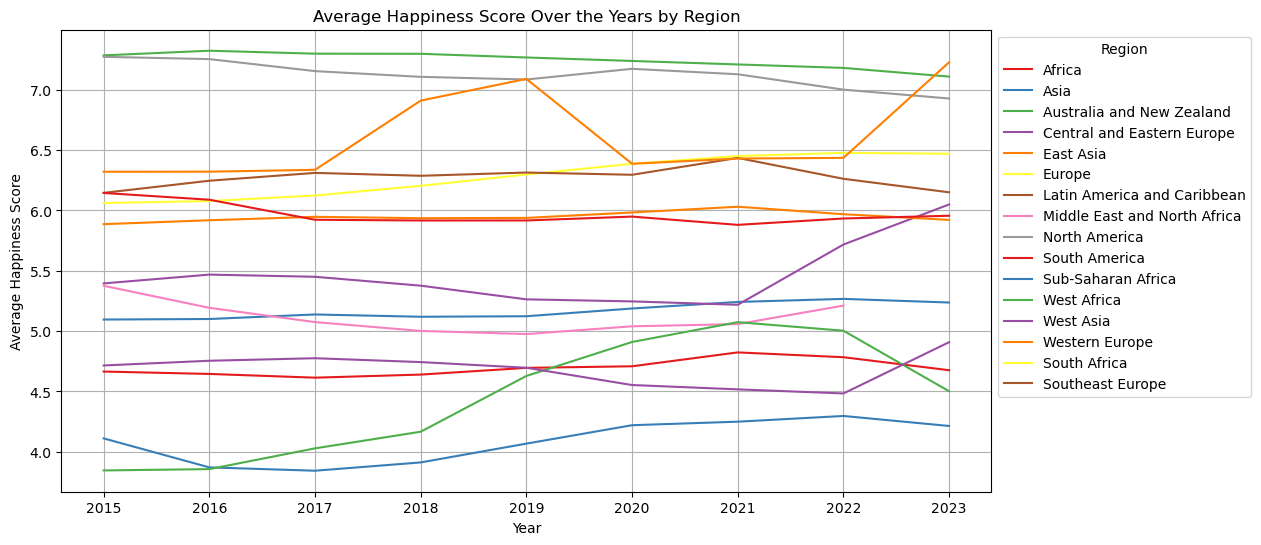

In [47]:
mean_happiness_per_region = concatenated_data.groupby(['Year', 'Region'])['Happiness Score'].mean().reset_index()

sns.set_palette("Set1")

unique_regions = mean_happiness_per_region['Region'].unique()

plt.figure(figsize=(12, 6))
for region in unique_regions:
    region_data = mean_happiness_per_region[mean_happiness_per_region['Region'] == region]
    sns.lineplot(x='Year', y='Happiness Score', data=region_data, label=region)
    
plt.title('Average Happiness Score Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

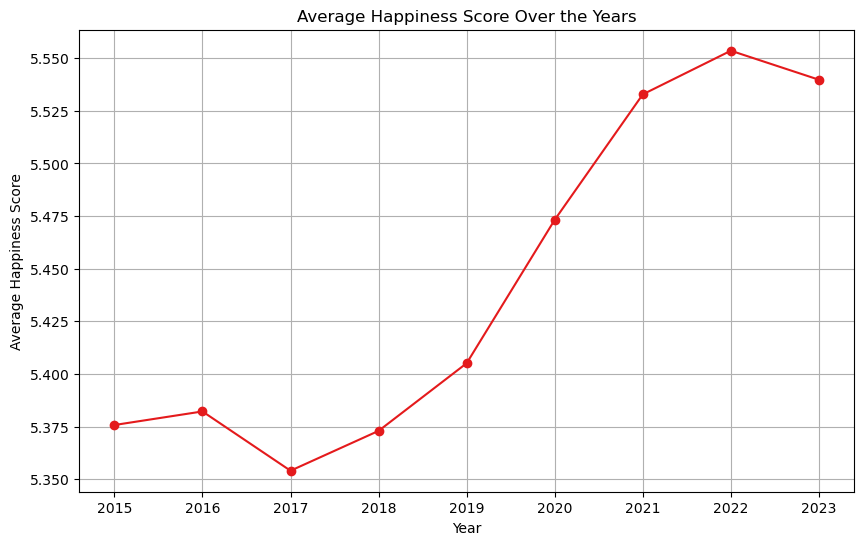

In [48]:
mean_happiness_per_year = concatenated_data.groupby('Year')['Happiness Score'].mean()

plt.figure(figsize=(10, 6))
mean_happiness_per_year.plot(marker='o')
plt.title('Average Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.show()


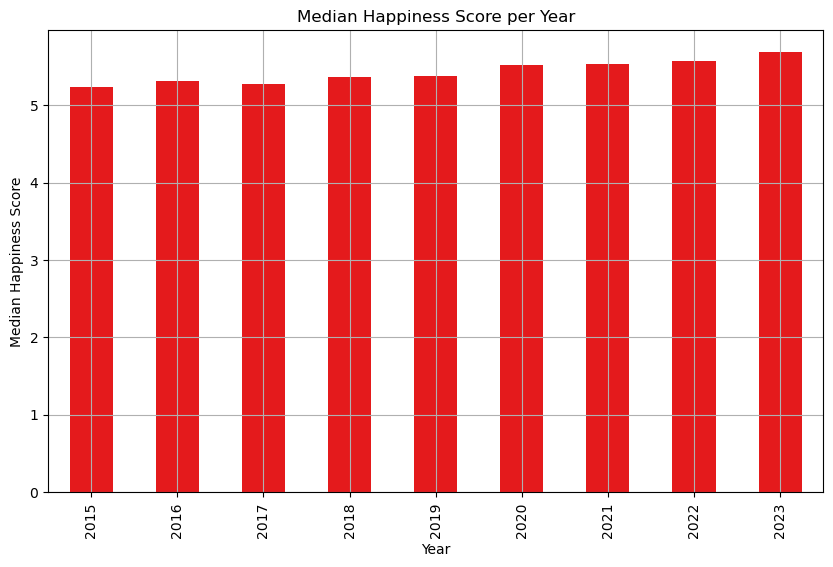

In [49]:
plt.figure(figsize=(10, 6))
median_happiness_per_year.plot(kind='bar')
plt.title('Median Happiness Score per Year')
plt.xlabel('Year')
plt.ylabel('Median Happiness Score')
plt.grid(True)
plt.show()


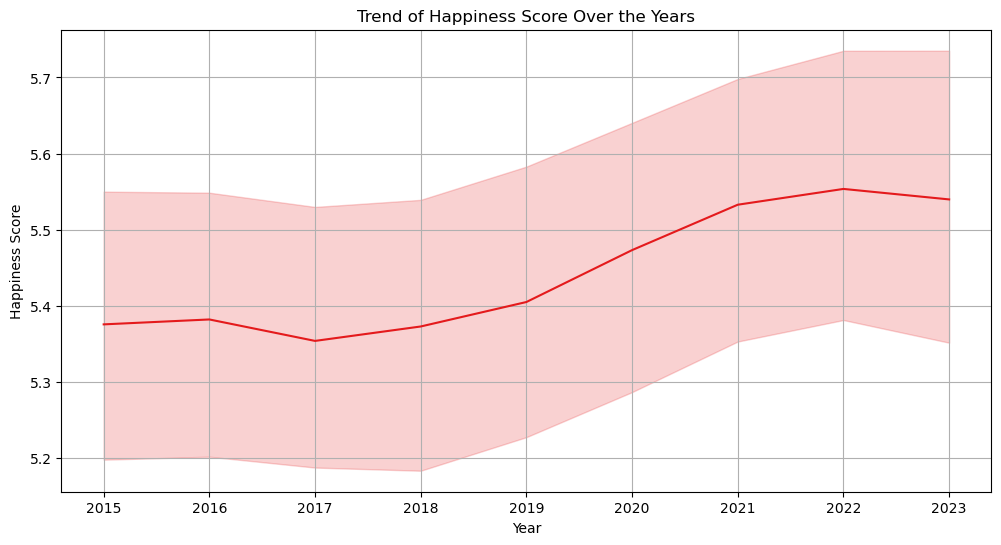

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Happiness Score', data=concatenated_data)
plt.title('Trend of Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

In [52]:
average_happiness_by_region = concatenated_data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
print(average_happiness_by_region)

Region
Australia and New Zealand       7.251857
North America                   7.127823
Western Europe                  6.512533
Europe                          6.281994
Latin America and Caribbean     6.269653
South America                   5.970221
East Asia                       5.947600
Central and Eastern Europe      5.438589
Asia                            5.166826
Middle East and North Africa    5.115929
Africa                          4.690026
West Asia                       4.682644
Southeast Europe                4.614000
West Africa                     4.445622
South Africa                    4.396000
Sub-Saharan Africa              4.099054
Name: Happiness Score, dtype: float64


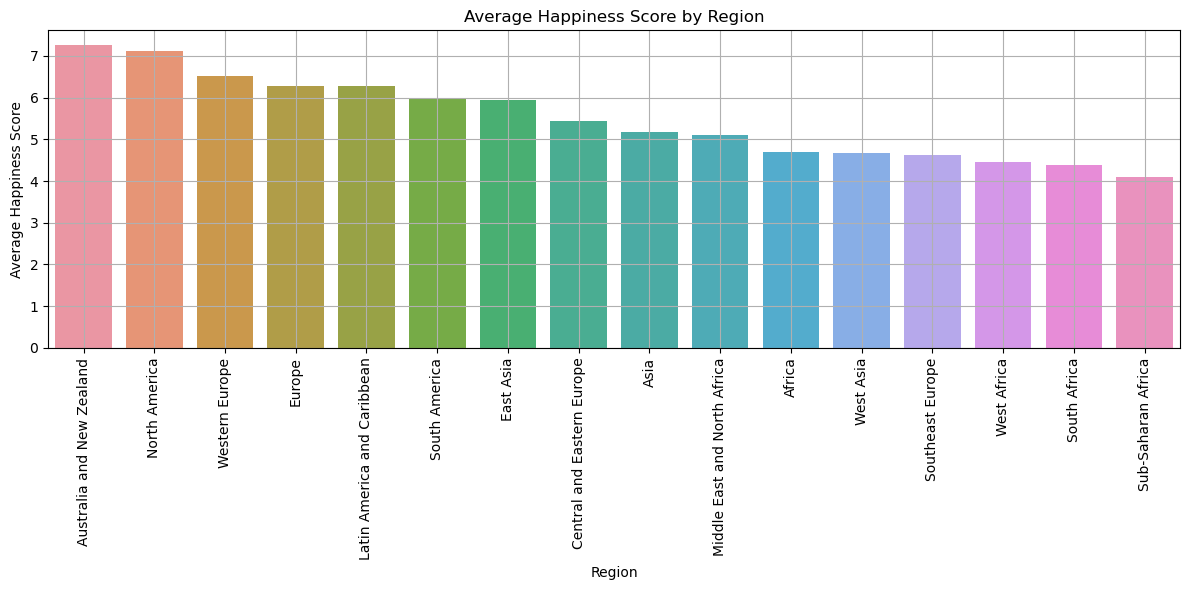

In [53]:
average_happiness_by_region = concatenated_data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=average_happiness_by_region.index, y=average_happiness_by_region.values)
plt.title('Average Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=90)


plt.grid(True)
plt.tight_layout()
plt.show()



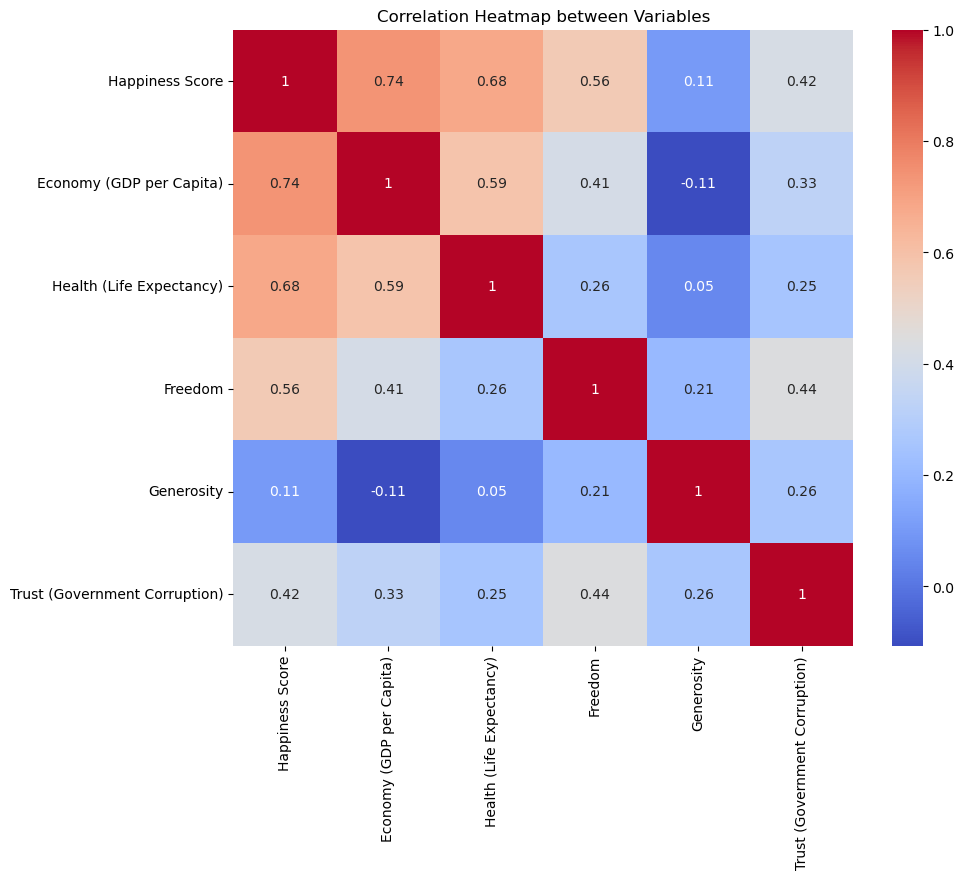

In [54]:
selected_vars = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

correlation_matrix = concatenated_data[selected_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Variables')
plt.show()

In [55]:
correlation = concatenated_data['Economy (GDP per Capita)'].corr(concatenated_data['Happiness Score'])
print(f"Correlation between Economy and Happiness Score: {correlation:.3f}")

Correlation between Economy and Happiness Score: 0.741


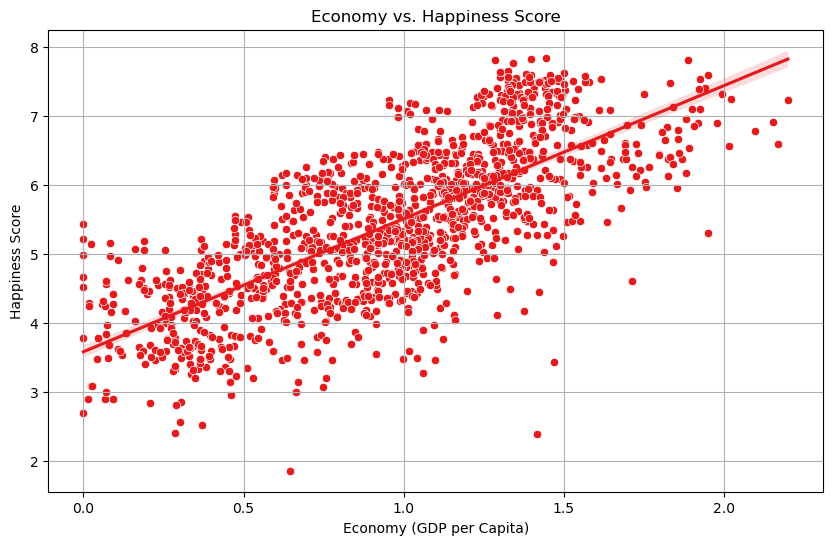

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=concatenated_data)
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=concatenated_data, scatter=False)
plt.title('Economy vs. Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

In [57]:
X = concatenated_data['Economy (GDP per Capita)']
y = concatenated_data['Happiness Score']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1656.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.40e-237
Time:                        19:39:16   Log-Likelihood:                -1546.8
No. Observations:                1365   AIC:                             3098.
Df Residuals:                    1363   BIC:                             3108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [58]:
predicted_scores = model.predict(X)

mse = mean_squared_error(y, predicted_scores)
r2 = r2_score(y, predicted_scores)
mae = mean_absolute_error(y, predicted_scores)
rmse = mean_squared_error(y, predicted_scores, squared=False)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 0.5646442538149947
R-squared: 0.5484532687591057
Mean Absolute Error: 0.60111191573665
Root Mean Squared Error: 0.7514281428153957


In [59]:
concatenated_data = concatenated_data.dropna()

In [60]:
metrics_by_column = {}

numerical_columns = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

for column in numerical_columns:
    X = concatenated_data[column].values.reshape(-1, 1)
    y = concatenated_data['Happiness Score']

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    predicted_scores = model.predict(X)

    mse = mean_squared_error(y, predicted_scores)
    r2 = r2_score(y, predicted_scores)
    mae = mean_absolute_error(y, predicted_scores)
    rmse = mean_squared_error(y, predicted_scores, squared=False)

    metrics_by_column[column] = {
        'Mean Squared Error': mse,
        'R-squared': r2,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse
    }

metrics_df = pd.DataFrame(metrics_by_column)

print(metrics_df)


                         Economy (GDP per Capita)  Health (Life Expectancy)  \
Mean Squared Error                       0.564371                  0.668779   
R-squared                                0.548788                  0.465314   
Mean Absolute Error                      0.600761                  0.668499   
Root Mean Squared Error                  0.751246                  0.817789   

                          Freedom  Trust (Government Corruption)  Generosity  
Mean Squared Error       0.855332                       1.032961    1.236987  
R-squared                0.316166                       0.174152    0.011034  
Mean Absolute Error      0.747364                       0.841018    0.926945  
Root Mean Squared Error  0.924842                       1.016347    1.112199  


In [68]:
concatenated_data

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
9134,Congo (Kinshasa),Africa,3.207,0.53100,0.10500,0.37500,0.06800,0.18300,2023
9151,Zimbabwe,Africa,3.204,0.75800,0.06900,0.36300,0.11700,0.11200,2023
9187,Sierra Leone,Africa,3.138,0.67000,0.09200,0.37100,0.05100,0.19300,2023
9223,Lebanon,Africa,2.392,1.41700,0.39800,0.12300,0.02700,0.06100,2023


In [78]:
concatenated_data.to_csv('world_happiness_data.csv', index=False)

In [79]:
concatenated_data

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
9134,Congo (Kinshasa),Africa,3.207,0.53100,0.10500,0.37500,0.06800,0.18300,2023
9151,Zimbabwe,Africa,3.204,0.75800,0.06900,0.36300,0.11700,0.11200,2023
9187,Sierra Leone,Africa,3.138,0.67000,0.09200,0.37100,0.05100,0.19300,2023
9223,Lebanon,Africa,2.392,1.41700,0.39800,0.12300,0.02700,0.06100,2023
